# import necessary dependencies

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression

In [10]:
credit_card_data = pd.read_csv("/content/drive/MyDrive/creditcard.csv")

# data analysis

In [11]:
credit_card_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37717,39076,1.117749,-1.544665,-0.145357,-1.307482,-1.392833,-0.630833,-0.563659,-0.038716,-2.173892,...,-0.334155,-1.108220,0.070461,0.115485,0.078726,-0.460844,-0.029143,0.029028,183.19,0.0
37718,39076,0.758729,-0.483875,0.125488,1.449159,-0.639231,-0.805011,0.406994,-0.221212,0.068777,...,0.210712,0.063091,-0.316636,0.394472,0.558720,-0.304812,-0.033008,0.063331,250.00,0.0
37719,39076,-0.474907,0.835804,0.075878,-1.251283,2.492736,3.385419,0.169507,0.934749,-0.584224,...,-0.270398,-0.866353,-0.085720,0.986274,-0.082934,0.084198,0.310936,0.170342,1.49,0.0
37720,39077,-2.682780,-2.028562,1.745223,-1.157952,-0.143692,-0.807503,-1.154141,0.436917,-0.293442,...,0.353396,0.968145,-0.776459,0.182662,-0.000427,-0.209058,0.256991,-0.585781,102.00,0.0


In [12]:
ccd = credit_card_data

In [13]:
ccd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37722 entries, 0 to 37721
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    37722 non-null  int64  
 1   V1      37722 non-null  float64
 2   V2      37722 non-null  float64
 3   V3      37722 non-null  float64
 4   V4      37722 non-null  float64
 5   V5      37722 non-null  float64
 6   V6      37722 non-null  float64
 7   V7      37721 non-null  float64
 8   V8      37721 non-null  float64
 9   V9      37721 non-null  float64
 10  V10     37721 non-null  float64
 11  V11     37721 non-null  float64
 12  V12     37721 non-null  float64
 13  V13     37721 non-null  float64
 14  V14     37721 non-null  float64
 15  V15     37721 non-null  float64
 16  V16     37721 non-null  float64
 17  V17     37721 non-null  float64
 18  V18     37721 non-null  float64
 19  V19     37721 non-null  float64
 20  V20     37721 non-null  float64
 21  V21     37721 non-null  float64
 22


# no object data type so we wouldn't need any conversions in here

In [14]:
ccd.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [15]:
# no null values, that's great

In [17]:
# distribution of fraudulent and legitimate classes
ccd['Class'].value_counts()

0.0    37618
1.0      103
Name: Class, dtype: int64

In [ ]:
# where 1 - depicts fraudulent cases and 0 -  depicts legitimate classes which actually implies that this dataset is highly imbalanced

# Data Visualization

In [18]:
# visualizing the class distribution in percentage

Class
0.0    99.726943
1.0     0.273057
Name: Class, dtype: float64


<Axes: ylabel='Class'>

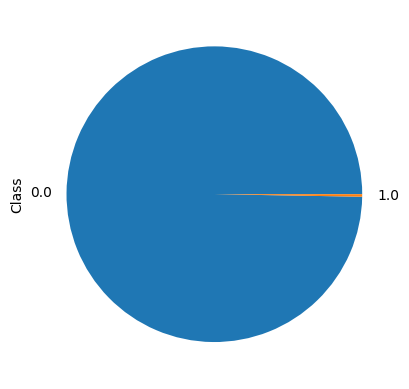

In [19]:
print((ccd.groupby('Class')['Class'].count()/ccd['Class'].count())*100)
((ccd.groupby('Class')['Class'].count()/ccd['Class'].count())*100).plot.pie()

In [20]:
classes = ccd['Class'].value_counts()
normal_value = round(classes[0]/ccd['Class'].count()*100,2)
fraud_values = round(classes[1]/ccd['Class'].count()*100,2)
print(normal_value)
print(fraud_values)

99.73
0.27


In [21]:
# let's check tthe correlation of the features

In [22]:
corr = ccd.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.017817,-0.115667,-0.060288,-0.039296,-0.074106,-0.012260,-0.006050,0.039421,-0.336237,...,0.023977,0.052709,-0.007321,-0.015493,0.052518,-0.031422,-0.011783,0.000281,0.074106,-0.017828
V1,0.017817,1.000000,-0.111584,0.286233,-0.092395,0.084105,0.097732,0.152652,-0.086903,-0.038683,...,-0.066936,-0.011574,-0.066625,-0.008550,0.186100,0.026450,-0.120735,0.176195,-0.220606,-0.216471
V2,-0.115667,-0.111584,1.000000,-0.223858,0.115026,-0.105633,-0.023214,-0.052119,0.060928,-0.005773,...,0.023571,-0.093610,-0.017909,-0.019256,-0.096462,-0.045454,0.062534,0.034869,-0.516488,0.196077
V3,-0.060288,0.286233,-0.223858,1.000000,-0.140251,0.292462,-0.005329,0.334333,-0.275757,0.160022,...,0.000840,0.241981,0.049262,0.029403,-0.192161,0.059021,-0.166184,0.059715,-0.173946,-0.402231
V4,-0.039296,-0.092395,0.115026,-0.140251,1.000000,-0.064532,-0.043252,-0.092966,0.090215,-0.014563,...,0.001601,-0.004179,-0.008036,-0.014825,-0.014468,0.024185,0.064115,-0.029914,0.096238,0.213120
V5,-0.074106,0.084105,-0.105633,0.292462,-0.064532,1.000000,0.090833,0.053985,-0.108779,0.041947,...,-0.057700,-0.072477,0.011837,-0.009555,-0.049813,-0.046523,-0.109984,0.003799,-0.382210,-0.198373
V6,-0.012260,0.097732,-0.023214,-0.005329,-0.043252,0.090833,1.000000,0.089813,-0.057475,0.046951,...,0.046430,0.017426,-0.004544,0.017301,0.062202,0.013422,-0.021321,-0.019242,0.212528,-0.096312
V7,-0.006050,0.152652,-0.052119,0.334333,-0.092966,0.053985,0.089813,1.000000,-0.134787,0.044997,...,-0.068880,0.001355,0.090767,-0.002241,-0.117281,-0.041814,-0.152883,-0.056514,0.351464,-0.319342
V8,0.039421,-0.086903,0.060928,-0.275757,0.090215,-0.108779,-0.057475,-0.134787,1.000000,-0.067522,...,-0.127203,0.054341,-0.053180,0.003131,0.028820,-0.000763,0.054021,0.076615,-0.076961,0.163140
V9,-0.336237,-0.038683,-0.005773,0.160022,-0.014563,0.041947,0.046951,0.044997,-0.067522,1.000000,...,-0.023450,0.009373,-0.035827,0.009931,0.095847,0.082930,-0.046852,-0.058527,-0.024000,-0.135874


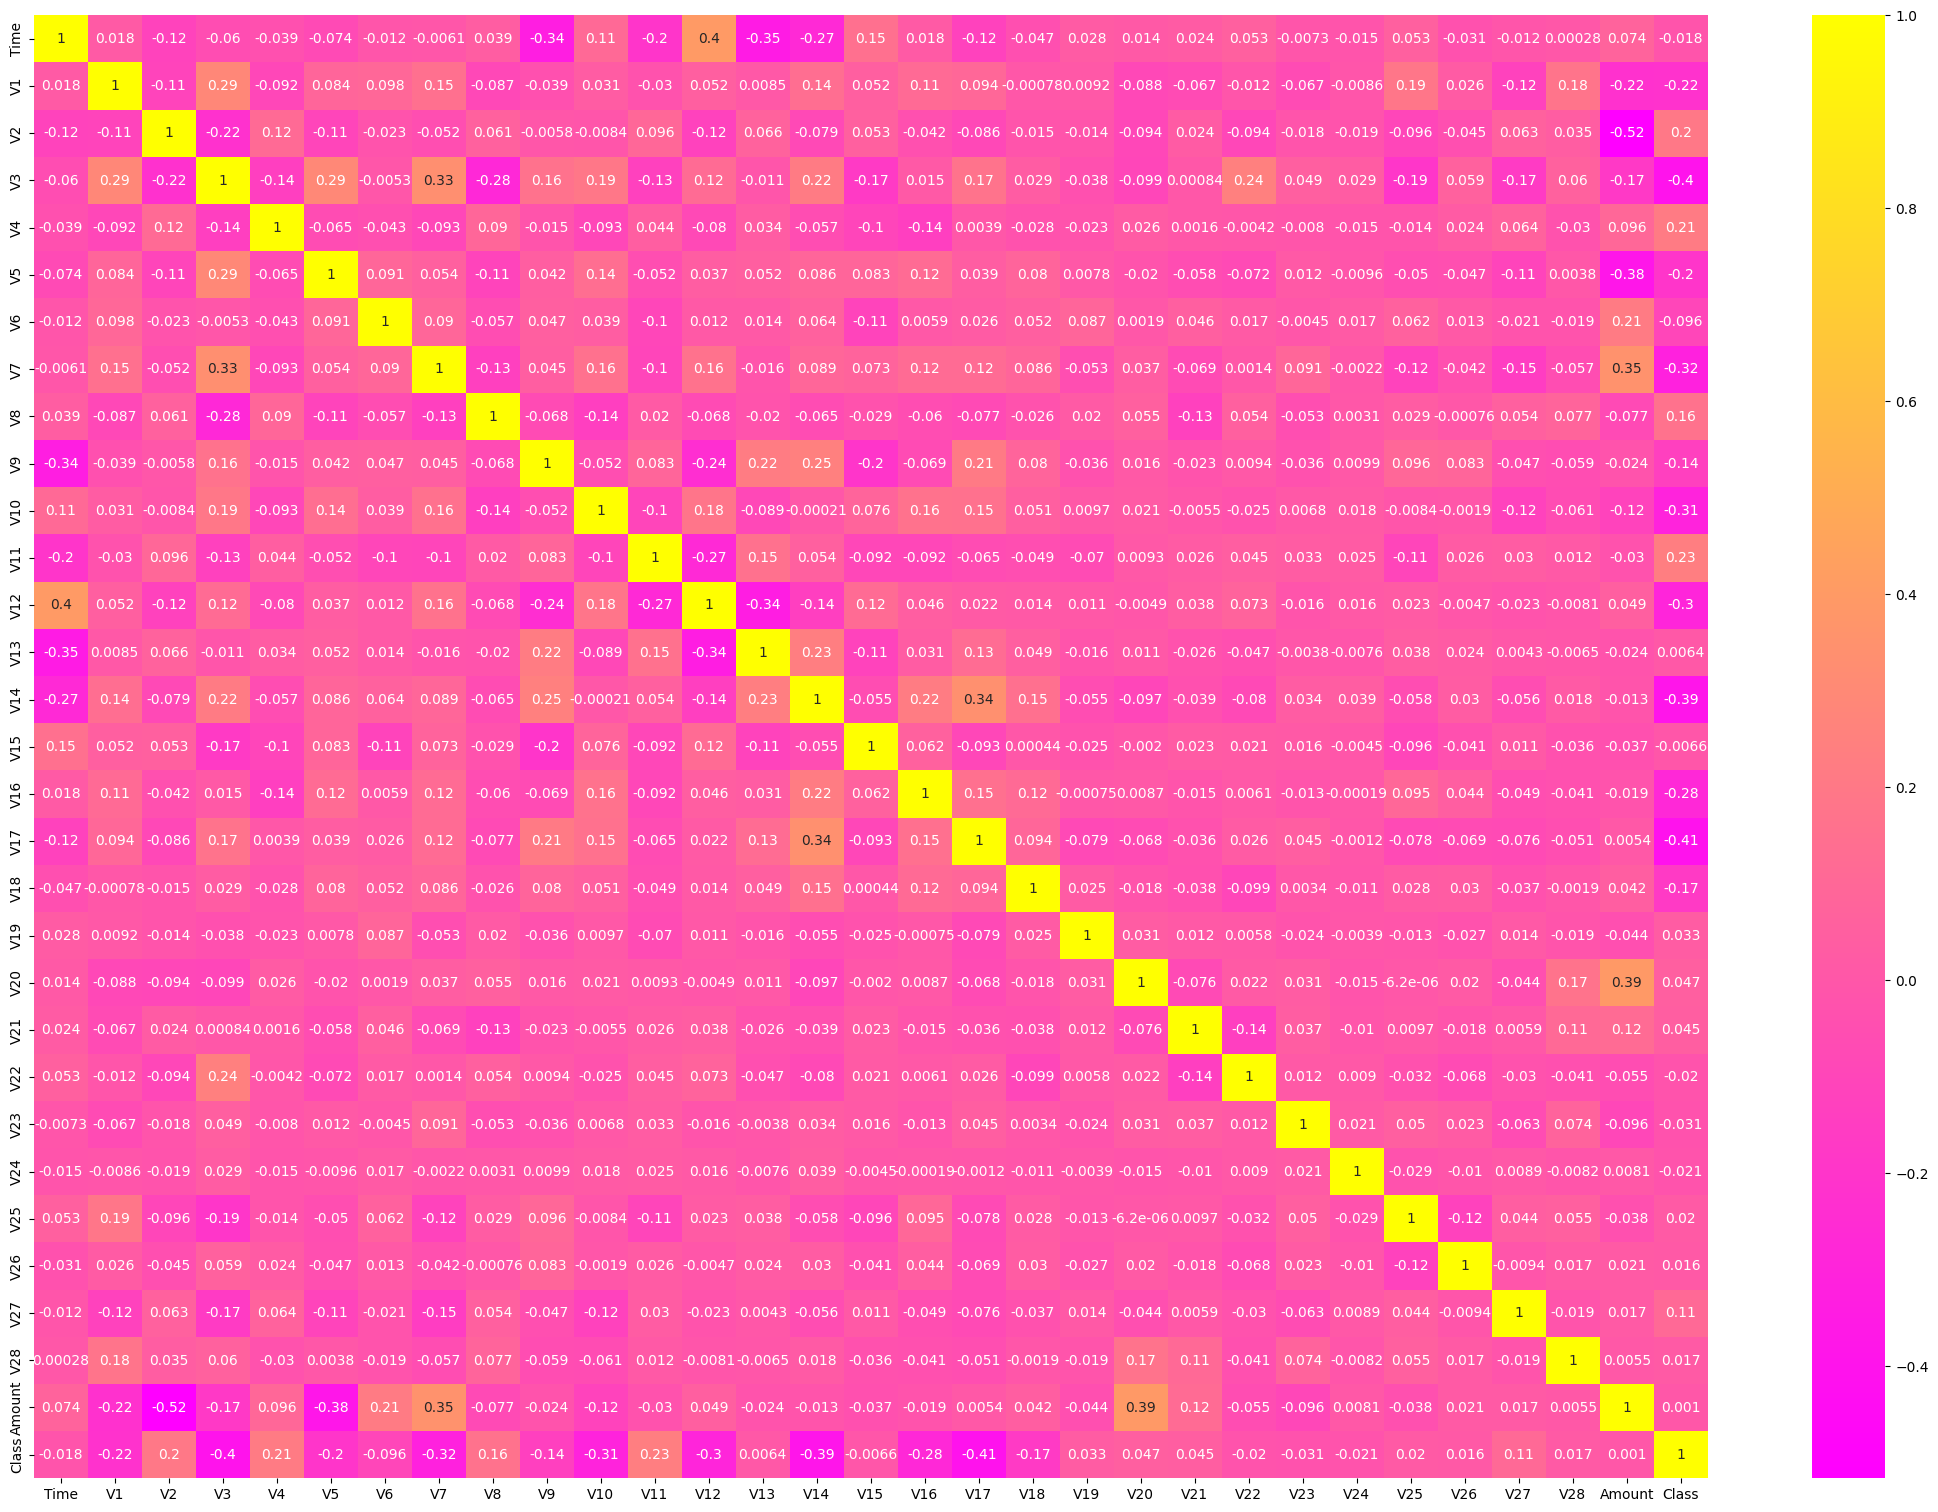

In [23]:
# plotting the heatmap for the correlation
plt.figure(figsize=(27,19))
sns.heatmap(corr, cmap = 'spring', annot= True )
plt.show()

In [24]:
# separte the data according to type of transaction i.e. fraud or legit

In [25]:
legit = ccd[ccd.Class == 0]

In [26]:
fraud = ccd[ccd.Class==1]

In [27]:
legit.Amount.describe()

count    37618.000000
mean        86.017411
std        232.957939
min          0.000000
25%          7.300000
50%         22.880000
75%         77.675000
max       7879.420000
Name: Amount, dtype: float64

In [28]:

fraud.Amount.describe()

count     103.000000
mean       90.471165
std       247.173335
min         0.000000
25%         1.000000
50%         3.760000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [29]:
# we can observe that the mean amount spent for fraud transactions is actually more than for the legit ones

In [30]:
ccd.groupby('Class').describe()

Time                                                                 \
         count          mean           std    min      25%      50%       75%   
Class                                                                           
0.0    37618.0  24778.212797  12531.376600    0.0  13921.5  29847.5  34943.75   
1.0      103.0  20498.291262  10224.604576  406.0  11086.0  20451.0  28641.50   

                     V1            ...       V28             Amount  \
           max    count      mean  ...       75%       max    count   
Class                              ...                                
0.0    39077.0  37618.0 -0.186787  ...  0.075122  5.678671  37618.0   
1.0    37167.0    103.0 -7.762676  ...  0.483431  1.108933    103.0   

                                                                
            mean         std  min  25%    50%     75%      max  
Class                                                           
0.0    86.017411  232.957939  0.0  7.3  22.88  77.675  7879.42  
1.0    90.471165  247.173335  0.0  1.0   3.76  99.990  1809.68  

[2 rows x 240 columns]

In [31]:
ccd.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,24778.212797,-0.186787,0.044196,0.749331,0.176750,-0.209569,0.105912,-0.092989,0.025693,0.243321,...,0.044683,-0.032046,-0.111604,-0.040404,0.007159,0.135739,0.021382,0.007030,0.003658,86.017411
1.0,20498.291262,-7.762676,5.838647,-10.957218,5.911555,-5.453798,-2.306085,-7.743100,3.867920,-2.961800,...,0.652319,0.628539,-0.354537,-0.362138,-0.234731,0.300023,0.180390,0.822304,0.102481,90.471165


In [32]:
# there's a significant difference in the mean value for our normal transaction and mean value for our fraud transactions

In [33]:
# now to balance the data for legit and fraud transaction value points
# we will use sampling for creating a new dataset of normal transactions with 492 entries being selected randomly out of 284315

In [34]:
normal_sample = legit.sample(n=492)

In [35]:
# now merge the two datasets for fraud and legit transactions with equal number of sampl points

In [36]:
new_dataset = pd.concat([normal_sample, fraud], axis = 0) # axis =0 species row wise joining of the datasets l

In [37]:
new_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3627,3102,1.374526,-0.276225,-1.618253,-2.050733,1.992834,2.783483,-0.404155,0.664086,0.908885,...,-0.011326,-0.034132,-0.177910,1.026454,0.962914,-0.585950,0.042339,0.011028,1.00,0.0
13502,23908,-1.818708,0.443808,2.131463,1.632167,1.662504,-0.500113,-0.055358,0.044363,0.378596,...,-0.330246,-0.693687,-0.445980,-0.531936,0.429060,-0.180423,0.244116,0.084418,22.75,0.0
17259,28576,-0.864206,1.437275,1.488586,1.226244,0.744387,-0.645189,1.280203,-0.079365,-1.779219,...,0.137021,0.175714,-0.291128,0.507173,0.376237,-0.130031,-0.126718,0.074666,6.51,0.0
26306,33998,-1.905018,-0.220685,3.554131,0.912503,-1.062276,1.024640,-0.046958,0.289911,1.508943,...,-0.170769,0.522638,-0.434842,0.601700,0.314133,1.010901,0.257918,-0.170707,144.63,0.0
25351,33571,-1.536599,1.516375,0.735689,-0.959267,-0.263794,-0.602247,-0.394321,-2.316649,-1.449722,...,-1.507104,-0.584837,0.250839,0.547515,-0.365965,0.433023,-0.154951,0.011611,29.47,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30442,35926,-3.896583,4.518355,-4.454027,5.547453,-4.121459,-1.163407,-6.805053,2.928356,-4.917130,...,1.691042,0.920021,-0.151104,0.011007,0.080303,0.412191,0.635789,0.501050,4.56,1.0
30473,35942,-4.194074,4.382897,-5.118363,4.455230,-4.812621,-1.224645,-7.281328,3.332250,-3.679659,...,1.550473,0.614573,0.028521,0.013704,-0.149512,-0.131687,0.473934,0.473757,14.46,1.0
30496,35953,-4.844372,5.649439,-6.730396,5.252842,-4.409566,-1.740767,-6.311699,3.449167,-5.416284,...,1.194888,-0.845753,0.190674,-0.216443,-0.325033,-0.270328,0.210214,0.391855,111.70,1.0
31002,36170,-5.685013,5.776516,-7.064977,5.902715,-4.715564,-1.755633,-6.958679,3.877795,-5.541529,...,1.128641,-0.962960,-0.110045,-0.177733,-0.089175,-0.049447,0.303445,0.219380,111.70,1.0


In [38]:
new_dataset['Class'].value_counts()

0.0    492
1.0    103
Name: Class, dtype: int64

In [39]:

new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,24586.215447,-0.126305,0.082904,0.731196,0.151702,-0.284604,0.178930,-0.139629,0.029357,0.306596,...,0.066644,-0.011302,-0.103840,-0.030160,-0.000870,0.167008,0.00854,0.015960,0.005122,87.382337
1.0,20498.291262,-7.762676,5.838647,-10.957218,5.911555,-5.453798,-2.306085,-7.743100,3.867920,-2.961800,...,0.652319,0.628539,-0.354537,-0.362138,-0.234731,0.300023,0.18039,0.822304,0.102481,90.471165


In [40]:
# here we can drop the time feature and instead use a derived column using timedelta function of pandas to represent the duration that is difference between two time values
delta_time = pd.to_timedelta(new_dataset['Time'], unit = 's')
# create the derived column
new_dataset['time_hour']=(delta_time.dt.components.hours).astype(int)
# now drop the time column
new_dataset.drop(columns='Time', axis=1, inplace = True)

In [41]:
new_dataset

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,time_hour
3627,1.374526,-0.276225,-1.618253,-2.050733,1.992834,2.783483,-0.404155,0.664086,0.908885,-0.862546,...,-0.034132,-0.177910,1.026454,0.962914,-0.585950,0.042339,0.011028,1.00,0.0,0
13502,-1.818708,0.443808,2.131463,1.632167,1.662504,-0.500113,-0.055358,0.044363,0.378596,-0.029666,...,-0.693687,-0.445980,-0.531936,0.429060,-0.180423,0.244116,0.084418,22.75,0.0,6
17259,-0.864206,1.437275,1.488586,1.226244,0.744387,-0.645189,1.280203,-0.079365,-1.779219,0.266409,...,0.175714,-0.291128,0.507173,0.376237,-0.130031,-0.126718,0.074666,6.51,0.0,7
26306,-1.905018,-0.220685,3.554131,0.912503,-1.062276,1.024640,-0.046958,0.289911,1.508943,0.700047,...,0.522638,-0.434842,0.601700,0.314133,1.010901,0.257918,-0.170707,144.63,0.0,9
25351,-1.536599,1.516375,0.735689,-0.959267,-0.263794,-0.602247,-0.394321,-2.316649,-1.449722,-1.400934,...,-0.584837,0.250839,0.547515,-0.365965,0.433023,-0.154951,0.011611,29.47,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30442,-3.896583,4.518355,-4.454027,5.547453,-4.121459,-1.163407,-6.805053,2.928356,-4.917130,-6.600461,...,0.920021,-0.151104,0.011007,0.080303,0.412191,0.635789,0.501050,4.56,1.0,9
30473,-4.194074,4.382897,-5.118363,4.455230,-4.812621,-1.224645,-7.281328,3.332250,-3.679659,-7.524368,...,0.614573,0.028521,0.013704,-0.149512,-0.131687,0.473934,0.473757,14.46,1.0,9
30496,-4.844372,5.649439,-6.730396,5.252842,-4.409566,-1.740767,-6.311699,3.449167,-5.416284,-7.833556,...,-0.845753,0.190674,-0.216443,-0.325033,-0.270328,0.210214,0.391855,111.70,1.0,9
31002,-5.685013,5.776516,-7.064977,5.902715,-4.715564,-1.755633,-6.958679,3.877795,-5.541529,-7.502112,...,-0.962960,-0.110045,-0.177733,-0.089175,-0.049447,0.303445,0.219380,111.70,1.0,10


# separating the features and target variables

In [42]:
x = new_dataset.drop('Class', axis=1)

In [43]:
y = new_dataset['Class']

In [44]:
x.shape

(595, 30)

In [45]:
y.shape

(595,)

# splitting the data into training and testing data

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 3, stratify = y)

In [47]:
#accumulating all the column names under one variable
cols = list(x.columns.values)

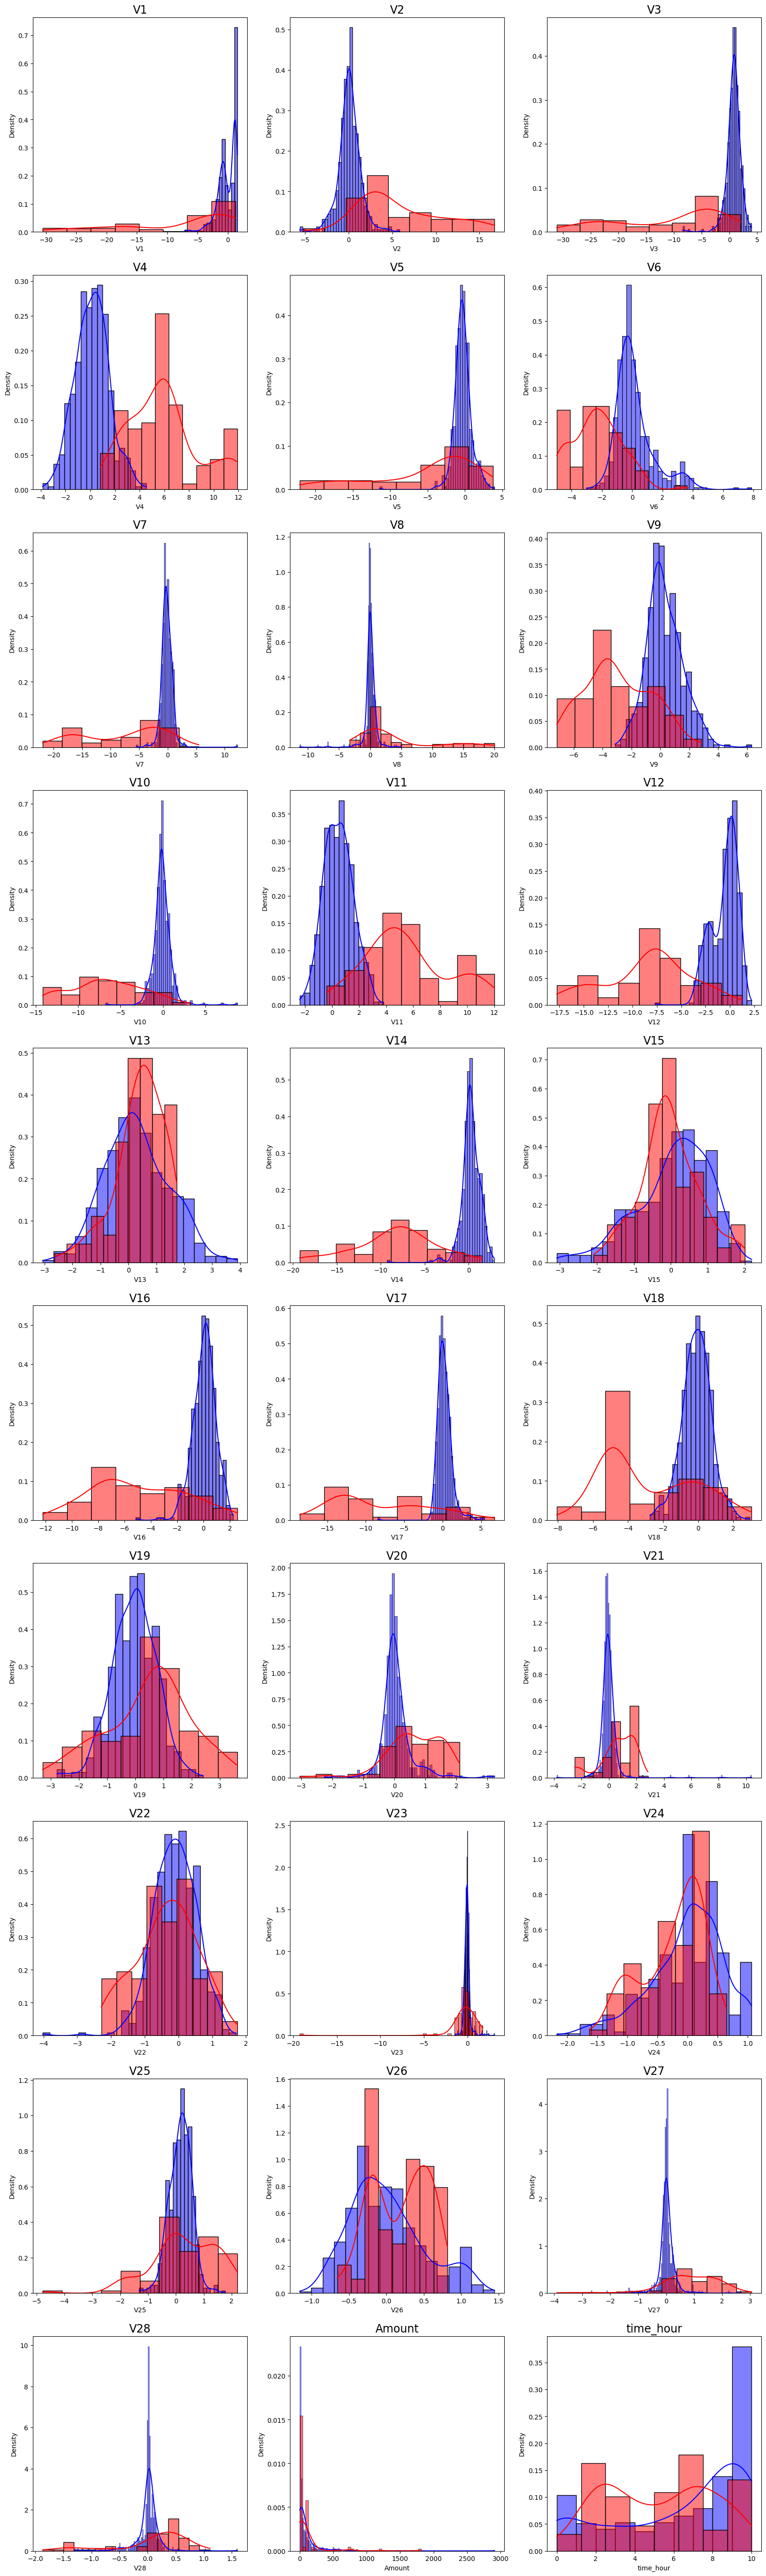

In [48]:
normal_entries = new_dataset.Class==0
fraud_entries = new_dataset.Class==1

plt.figure(figsize=(20,70))
for n, col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.histplot(x[col][normal_entries], color='blue', kde = True, stat = 'density')
    sns.histplot(x[col][fraud_entries], color='red', kde = True, stat = 'density')
    plt.title(col, fontsize=17)
plt.show()

In [49]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
pred_test = model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Model evaluation

In [50]:
# creating confusion matrix
from sklearn.metrics import confusion_matrix
def Plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test,pred_test)
    plt.clf()
    plt.show()

In [51]:
# accuracy on training data
acc_score= round(accuracy_score(y_pred, y_train)*100,2)

In [52]:
print('the accuracy score for training data of our model is :', acc_score)

the accuracy score for training data of our model is : 98.65


In [53]:
y_pred = model.predict(x_test)
acc_score = round(accuracy_score(y_pred, y_test)*100,2)

In [54]:
print('the accuracy score of our model is :', acc_score)

the accuracy score of our model is : 97.99


In [55]:
from sklearn import metrics

In [56]:
score = round(model.score(x_test, y_test)*100,2)
print('score of our model is :', score)

score of our model is : 97.99


In [57]:
class_report = classification_report(y_pred, y_test)
print('classification report of our model: ', class_report)

classification report of our model:                precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       126
         1.0       0.88      1.00      0.94        23

    accuracy                           0.98       149
   macro avg       0.94      0.99      0.96       149
weighted avg       0.98      0.98      0.98       149



In [ ]:
# we have achieved a model with decent accuracy score

# Thank You